In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import roc_auc_score, confusion_matrix
from PIL import Image

In [3]:
def norm(prob):
    '''Normalize prob into [0,1]'''
    norm_prob =  (prob - np.min(prob)) / (np.max(prob) - np.min(prob))
    
    return norm_prob


def plot_confusion_matrix(test, CLIP):
    matrix = confusion_matrix(test['label'], CLIP['label'])
    '''Plot Confusion Matrix'''
    percent = (matrix/matrix.sum())*100
    df_cm = pd.DataFrame(matrix, ['Non-Hateful','Hateful'], ['Non-Hateful','Hateful'])
    text = np.asarray([['True Negatives', 'False Positives'], ['False Negatives', 'True Positives']])
    label = (np.asarray(["{0}\n\n{1}\n\n{2: .2f}%".format(text,matrix,percent) for text, matrix, percent in zip(text.flatten(), matrix.flatten(), percent.flatten())])).reshape(2,2)

    AUROC = round(roc_auc_score(test['label'], norm(CLIP['proba']))*100, 2)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sn.set(font_scale=2)
    sn.heatmap(df_cm, annot=label, annot_kws={"size": 26}, fmt ='', cmap ='Blues', ax=ax)
    
    rect = patches.Rectangle((0, 0), 2, 2, linewidth=3, edgecolor='black', fill=False)
    ax.add_patch(rect)
    
    ax.text(0.5, 1.06, f'Test AUROC: {AUROC}%', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='darkred', fontsize=35)
    
    plt.xlabel("Predicted Label", ha='center', va='center', fontsize=26, labelpad=26)
    plt.ylabel("True Label", ha='center', va='bottom', fontsize=26, labelpad=26)
    
    plt.savefig('confusion_matrix.png', bbox_inches='tight', dpi=600)
    
    plt.show()

In [4]:
# load the test_seen set
test_seen = pd.read_json("../data/test_seen.jsonl", lines=True)

## Confusion Matrix

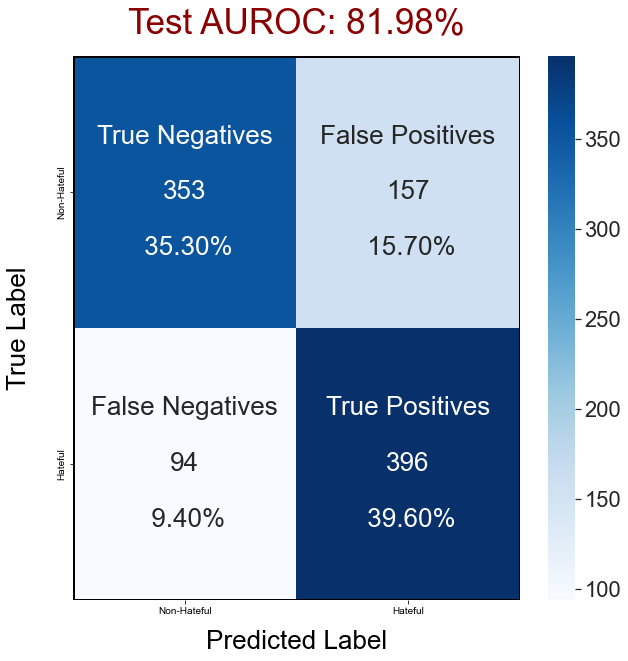

In [5]:
# plot confusion matrix of CLIP baseline model
CLIP_baseline = pd.read_csv('CLIP_baseline.csv')
plot_confusion_matrix(test_seen, CLIP_baseline)

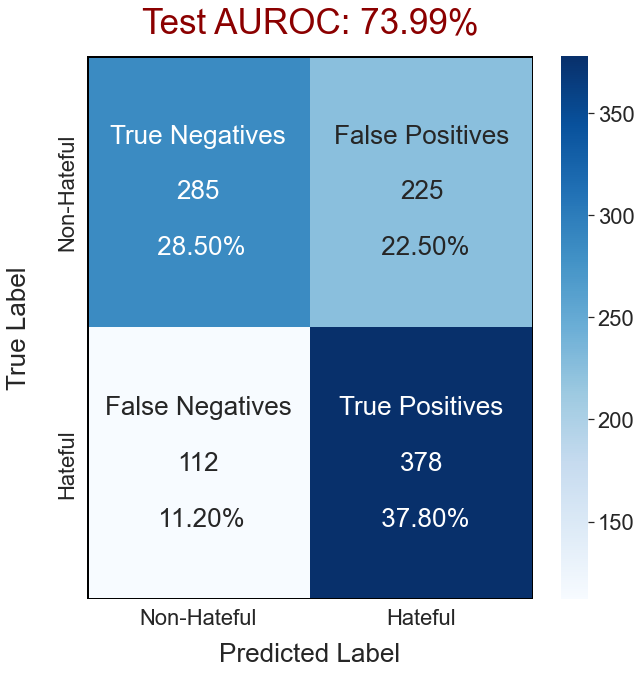

In [6]:
# plot confusion matrix of unimodal model with captioning features
CLIP_caption = pd.read_csv('CLIP_caption_without_image.csv')
plot_confusion_matrix(test_seen, CLIP_caption)

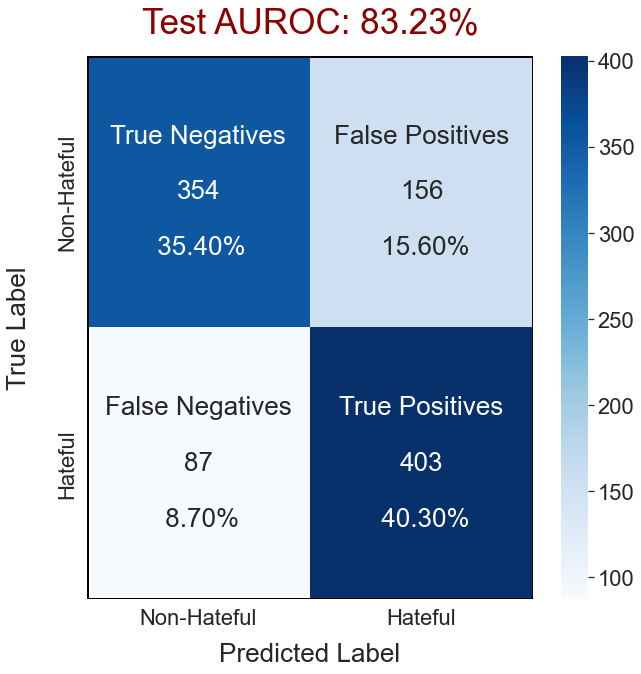

In [7]:
# plot confusion matrix of ensemble model
CLIP_ensemble = pd.read_csv('CLIP_ensemble.csv')
plot_confusion_matrix(test_seen, CLIP_ensemble)

## Memes that only CLIP-baseline Model classified wrongly

In [8]:
# False Positive cases (Non-Hateful meme prediced as Hateful) identified by CLIP baseline model but not identified by other models
False_Positive = test_seen['label'] != CLIP_baseline['label']
False_Positive &= test_seen['label'] == 0
False_Positive &= CLIP_caption['label'] == 0
False_Positive &= CLIP_ensemble['label'] == 0
FP_CLIP_baseline = test_seen[False_Positive].img.values
print(FP_CLIP_baseline)

['img/10652.png' 'img/90734.png' 'img/50483.png' 'img/01634.png'
 'img/10938.png' 'img/74236.png' 'img/91637.png' 'img/89136.png'
 'img/71253.png' 'img/84901.png' 'img/74281.png' 'img/17062.png'
 'img/37620.png']


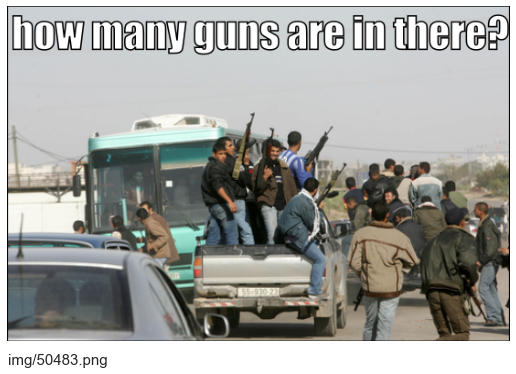

In [19]:
img = FP_CLIP_baseline[2]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

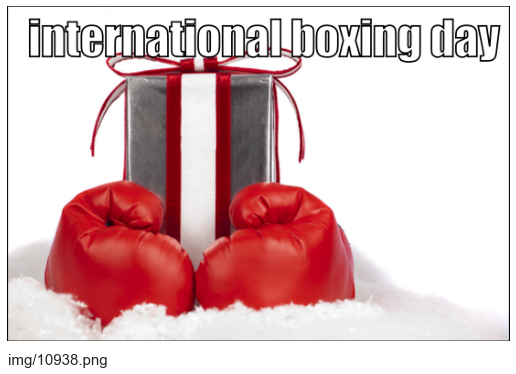

In [20]:
img = FP_CLIP_baseline[4]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

In [21]:
# False Negative cases (Hateful Meme predicted as Non-Hateful) identified by CLIP baseline model but not identified by other models
False_Negative = test_seen['label'] != CLIP_baseline['label']
False_Negative &= test_seen['label'] == 1
False_Negative &= CLIP_caption['label'] == 1
False_Negative &= CLIP_ensemble['label'] == 1
FN_CLIP_baseline = test_seen[False_Negative].img.values
print(FN_CLIP_baseline)

['img/39867.png' 'img/38045.png' 'img/83720.png' 'img/01284.png'
 'img/27980.png' 'img/47693.png' 'img/05219.png' 'img/70148.png'
 'img/26910.png' 'img/90657.png' 'img/79243.png' 'img/39658.png'
 'img/71950.png' 'img/23197.png' 'img/89421.png' 'img/25193.png'
 'img/26197.png' 'img/49201.png']


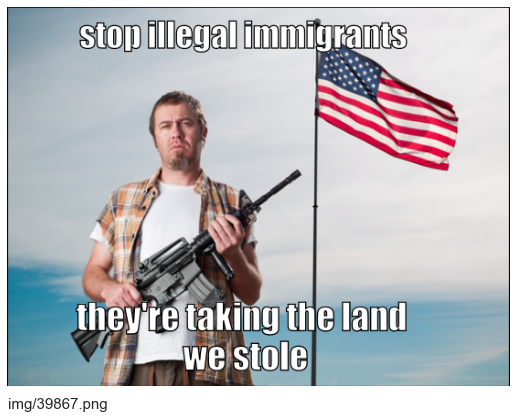

In [24]:
img = FN_CLIP_baseline[0]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

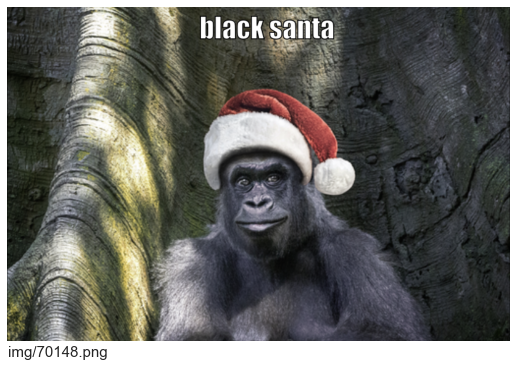

In [26]:
img = FN_CLIP_baseline[7]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

## Memes that only CLIP-baseline Model classified correctly

In [28]:
# True Positive cases (Hateful meme prediced as Hateful) identified by CLIP baseline model but not identified by other models
True_Positive = test_seen['label'] == CLIP_baseline['label']
True_Positive &= test_seen['label'] == 1
True_Positive &= CLIP_caption['label'] == 0
True_Positive &= CLIP_ensemble['label'] == 0
TP_CLIP_baseline = test_seen[True_Positive].img.values
print(TP_CLIP_baseline)

['img/49372.png' 'img/12643.png' 'img/07291.png' 'img/10963.png'
 'img/39564.png' 'img/95306.png' 'img/65148.png' 'img/84057.png'
 'img/27548.png' 'img/05846.png' 'img/51968.png' 'img/31042.png']


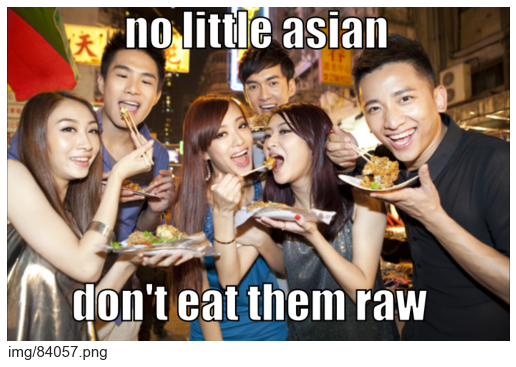

In [34]:
img = TP_CLIP_baseline[7]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

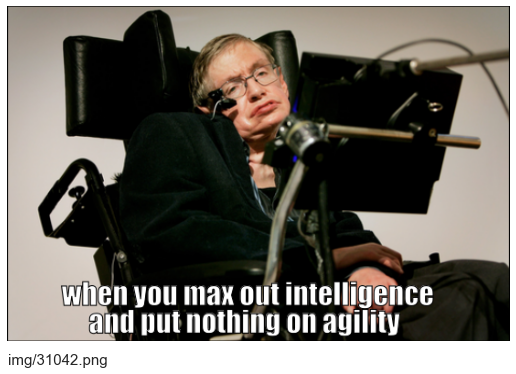

In [35]:
img = TP_CLIP_baseline[-1]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

In [30]:
# True Negative cases (Non-Hateful Meme predicted as Non-Hateful) identified by CLIP baseline model but not identified by other models
True_Negative = test_seen['label'] == CLIP_baseline['label']
True_Negative &= test_seen['label'] == 0
True_Negative &= CLIP_caption['label'] == 1
True_Negative &= CLIP_ensemble['label'] == 1
TN_CLIP_baseline = test_seen[True_Negative].img.values
print(TN_CLIP_baseline)

['img/31468.png' 'img/95371.png' 'img/09687.png' 'img/06329.png'
 'img/02751.png' 'img/75136.png' 'img/04135.png' 'img/54830.png'
 'img/64907.png' 'img/93857.png' 'img/42681.png' 'img/92014.png'
 'img/92785.png' 'img/48652.png' 'img/16423.png' 'img/70164.png'
 'img/09723.png' 'img/73841.png' 'img/87923.png']


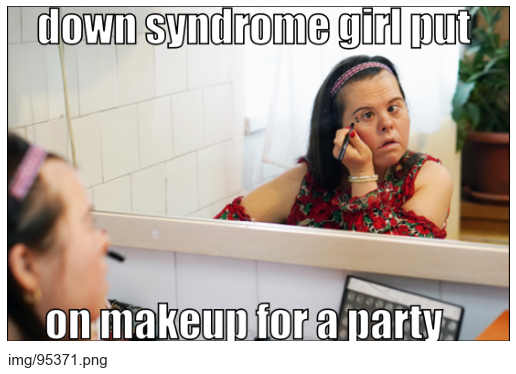

In [37]:
img = TN_CLIP_baseline[1]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

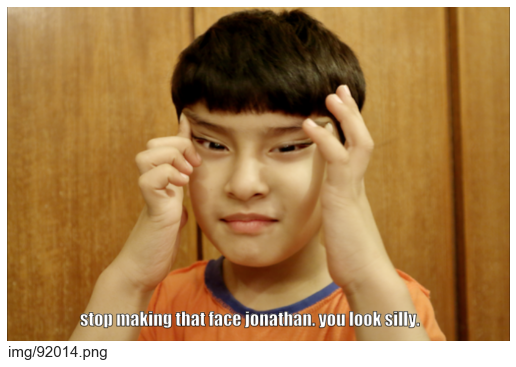

In [39]:
img = TN_CLIP_baseline[11]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

## Memes that only CLIP-caption-unimodal Model classified wrongly

In [40]:
# False Positive cases (Non-Hateful meme prediced as Hateful) identified by CLIP-caption-unimodal model but not identified by other models
False_Positive = test_seen['label'] != CLIP_caption['label']
False_Positive &= test_seen['label'] == 0
False_Positive &= CLIP_baseline['label'] == 0
False_Positive &= CLIP_ensemble['label'] == 0
FP_CLIP_caption = test_seen[False_Positive].img.values
print(FP_CLIP_caption)

['img/89263.png' 'img/52971.png' 'img/02356.png' 'img/59167.png'
 'img/19230.png' 'img/74029.png' 'img/57836.png' 'img/32907.png'
 'img/56291.png' 'img/80392.png' 'img/16302.png' 'img/65071.png'
 'img/60812.png' 'img/23619.png' 'img/45792.png' 'img/40578.png'
 'img/47863.png' 'img/31267.png' 'img/86425.png' 'img/25749.png'
 'img/52139.png' 'img/39527.png' 'img/39247.png' 'img/30815.png'
 'img/87352.png' 'img/54093.png' 'img/05792.png' 'img/40572.png'
 'img/40731.png' 'img/46815.png' 'img/47831.png' 'img/79825.png'
 'img/38401.png' 'img/01325.png' 'img/12589.png' 'img/89512.png'
 'img/89754.png' 'img/79105.png' 'img/26358.png' 'img/05389.png'
 'img/72830.png' 'img/61792.png' 'img/32067.png' 'img/71649.png'
 'img/92136.png' 'img/01324.png' 'img/61980.png' 'img/82964.png'
 'img/57128.png' 'img/95402.png' 'img/27105.png' 'img/21647.png'
 'img/27960.png' 'img/56409.png' 'img/49673.png' 'img/28463.png'
 'img/93046.png' 'img/54617.png' 'img/59384.png' 'img/64391.png'
 'img/29483.png' 'img/294

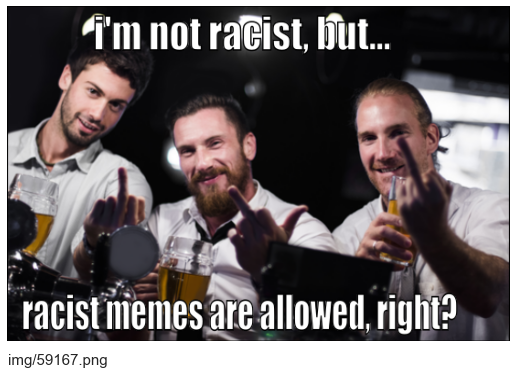

In [43]:
img = FP_CLIP_caption[3]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

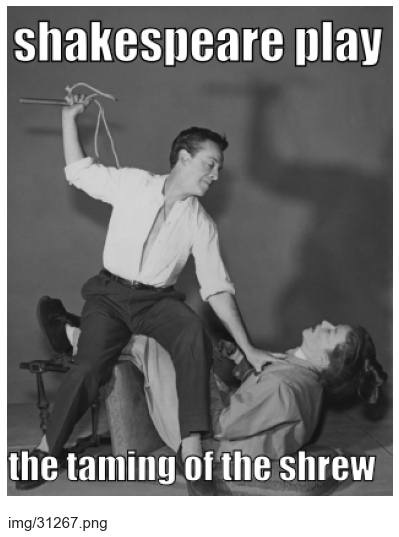

In [45]:
img = FP_CLIP_caption[17]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

In [46]:
# False Negative cases (Hateful Meme predicted as Non-Hateful) identified by CLIP-caption-unimodal model but not identified by other models
False_Negative = test_seen['label'] != CLIP_caption['label']
False_Negative &= test_seen['label'] == 1
False_Negative &= CLIP_baseline['label'] == 1
False_Negative &= CLIP_ensemble['label'] == 1
FN_CLIP_caption = test_seen[False_Negative].img.values
print(FN_CLIP_caption)

['img/43728.png' 'img/54920.png' 'img/81970.png' 'img/89607.png'
 'img/98026.png' 'img/91806.png' 'img/46532.png' 'img/10548.png'
 'img/24351.png' 'img/92456.png' 'img/89360.png' 'img/30154.png'
 'img/93145.png' 'img/07694.png' 'img/08541.png' 'img/17904.png'
 'img/14602.png' 'img/59671.png' 'img/79031.png' 'img/64730.png'
 'img/48315.png' 'img/45139.png' 'img/51928.png' 'img/95380.png'
 'img/87905.png' 'img/78152.png' 'img/61752.png' 'img/42507.png'
 'img/28196.png' 'img/01937.png' 'img/18430.png' 'img/26391.png'
 'img/24019.png' 'img/34708.png' 'img/96345.png' 'img/56327.png'
 'img/69308.png' 'img/29863.png' 'img/94107.png' 'img/36029.png'
 'img/78613.png' 'img/98137.png' 'img/31590.png' 'img/72450.png'
 'img/67924.png' 'img/94175.png' 'img/86173.png' 'img/31405.png']


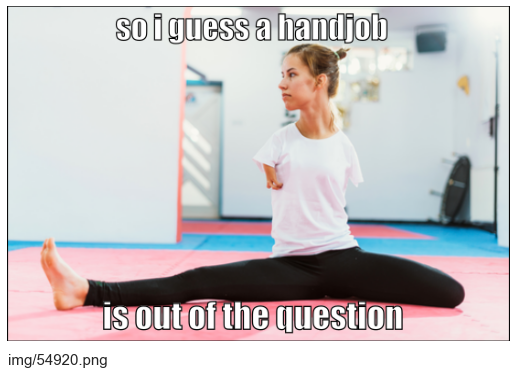

In [48]:
img = FN_CLIP_caption[1]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

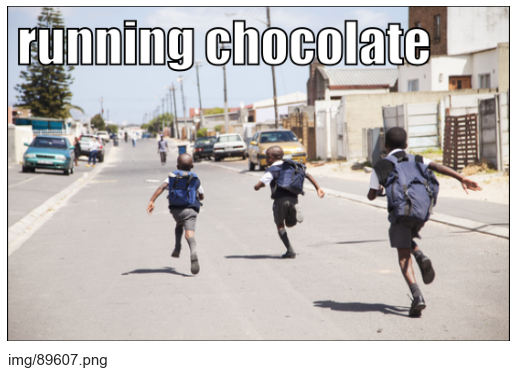

In [49]:
img = FN_CLIP_caption[3]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

## Memes that only CLIP-caption-ensemble Model classified correctly

In [50]:
# True Positive cases (Hateful meme prediced as Hateful) identified by CLIP-caption-ensemble model but not identified by other models
True_Positive = test_seen['label'] == CLIP_ensemble['label']
True_Positive &= test_seen['label'] == 1
True_Positive &= CLIP_caption['label'] == 0
True_Positive &= CLIP_baseline['label'] == 0
TP_CLIP_ensemble = test_seen[True_Positive].img.values
print(TP_CLIP_ensemble)

['img/82591.png' 'img/79316.png' 'img/03765.png' 'img/56294.png'
 'img/95072.png' 'img/16529.png' 'img/42036.png']


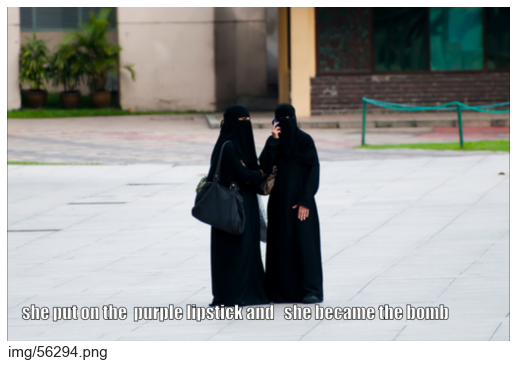

In [52]:
img = TP_CLIP_ensemble[3]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

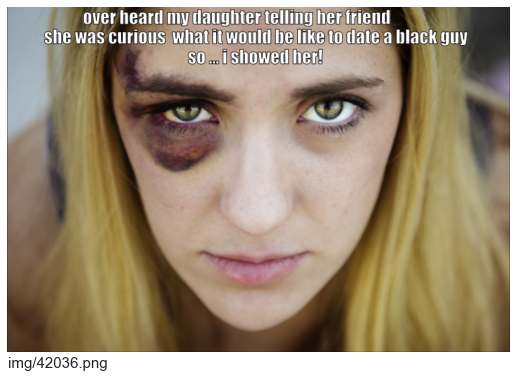

In [54]:
img = TP_CLIP_ensemble[-1]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

In [55]:
# True Negative cases (Non-Hateful Meme predicted as Non-Hateful) identified by CLIP-caption-ensemble model but not identified by other models
True_Negative = test_seen['label'] == CLIP_ensemble['label']
True_Negative &= test_seen['label'] == 0
True_Negative &= CLIP_caption['label'] == 1
True_Negative &= CLIP_baseline['label'] == 1
TN_CLIP_ensemble = test_seen[True_Negative].img.values
print(TN_CLIP_ensemble)

['img/57431.png' 'img/89026.png' 'img/03968.png' 'img/13907.png'
 'img/57869.png' 'img/57649.png' 'img/48379.png' 'img/21659.png'
 'img/63915.png' 'img/10482.png' 'img/71832.png' 'img/97021.png'
 'img/68321.png' 'img/40735.png' 'img/20786.png' 'img/72310.png']


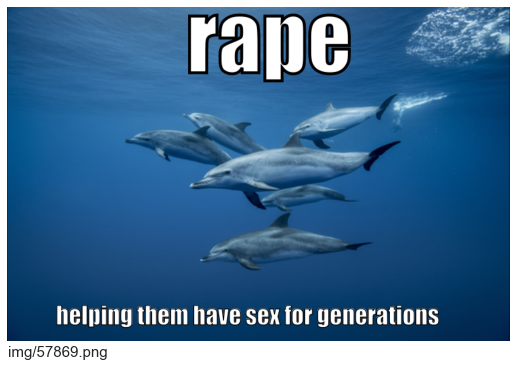

In [57]:
img = TN_CLIP_ensemble[4]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

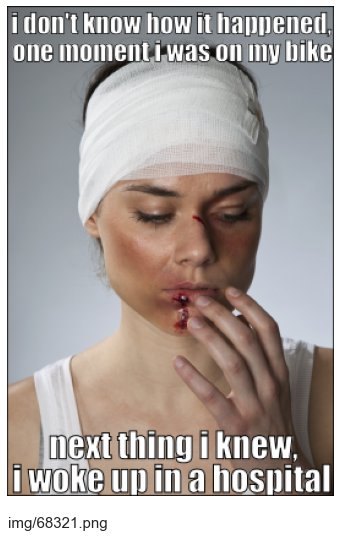

In [58]:
img = TN_CLIP_ensemble[12]
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

## Memes that all models mis-classified

In [59]:
# False Positive cases (Non-Hateful meme prediced as Hateful) identified by all models
False_Positive = test_seen['label'] != CLIP_baseline['label']
False_Positive &= test_seen['label'] == 0
False_Positive &= CLIP_caption['label'] == 1
False_Positive &= CLIP_ensemble['label'] == 1
FP_CLIP_all = test_seen[False_Positive].img.values
print(FP_CLIP_all)

['img/49267.png' 'img/42635.png' 'img/63502.png' 'img/37092.png'
 'img/76542.png' 'img/07652.png' 'img/07689.png' 'img/29710.png'
 'img/90538.png' 'img/06931.png' 'img/69403.png' 'img/04879.png'
 'img/09241.png' 'img/70456.png' 'img/48523.png' 'img/45093.png'
 'img/63719.png' 'img/98035.png' 'img/28579.png' 'img/45610.png'
 'img/54621.png' 'img/26549.png' 'img/15438.png' 'img/86025.png'
 'img/96502.png' 'img/17845.png' 'img/13874.png' 'img/57312.png'
 'img/62790.png' 'img/45827.png' 'img/79861.png' 'img/03987.png'
 'img/80914.png' 'img/21863.png' 'img/93481.png' 'img/90143.png'
 'img/63795.png' 'img/42986.png' 'img/41896.png' 'img/67951.png'
 'img/98473.png' 'img/57908.png' 'img/01459.png' 'img/93874.png'
 'img/05734.png' 'img/40723.png' 'img/87692.png' 'img/45176.png'
 'img/31920.png' 'img/78956.png' 'img/40316.png' 'img/76145.png'
 'img/87430.png' 'img/05379.png' 'img/36810.png' 'img/68190.png'
 'img/13074.png' 'img/48916.png' 'img/62307.png' 'img/47532.png'
 'img/86514.png' 'img/861

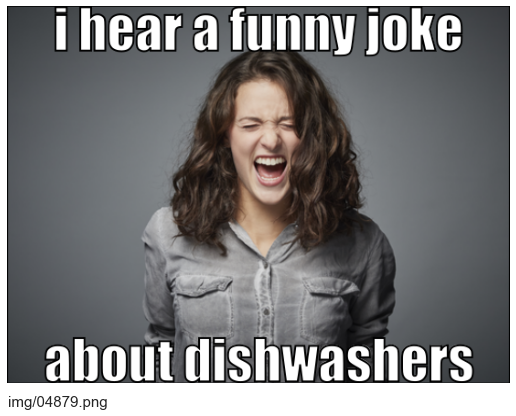

In [61]:
img = 'img/04879.png'
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

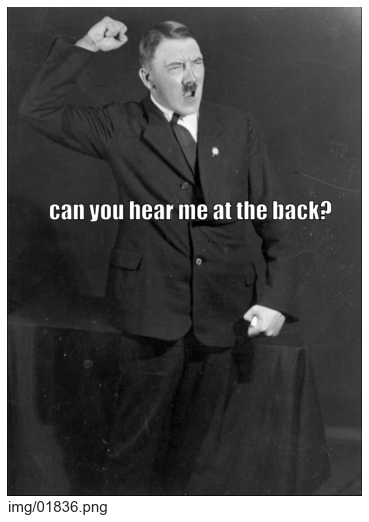

In [63]:
img = 'img/01836.png'
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

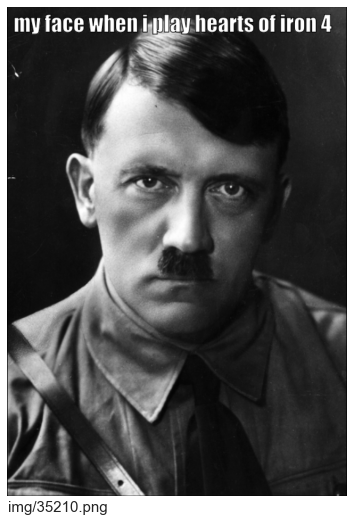

In [64]:
img = 'img/35210.png'
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

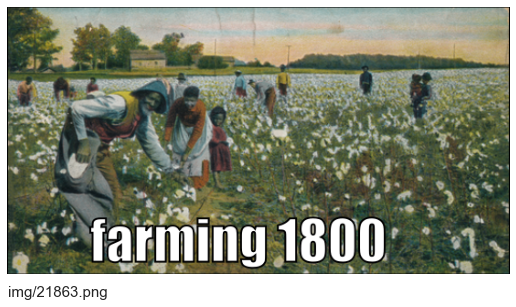

In [67]:
img = 'img/21863.png'
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

In [68]:
# False Negative cases (Hateful Meme predicted as Non-Hateful) identified by all models
False_Negative = test_seen['label'] != CLIP_baseline['label']
False_Negative &= test_seen['label'] == 1
False_Negative &= CLIP_caption['label'] == 0
False_Negative &= CLIP_ensemble['label'] == 0
FN_CLIP_all = test_seen[False_Negative].img.values
print(FN_CLIP_all)

['img/69421.png' 'img/57286.png' 'img/17546.png' 'img/56908.png'
 'img/02789.png' 'img/78092.png' 'img/15473.png' 'img/64735.png'
 'img/17096.png' 'img/80713.png' 'img/08524.png' 'img/07193.png'
 'img/51482.png' 'img/07396.png' 'img/05968.png' 'img/17852.png'
 'img/92837.png' 'img/57890.png' 'img/43269.png' 'img/80321.png'
 'img/28495.png' 'img/19740.png' 'img/89140.png' 'img/31875.png'
 'img/87532.png' 'img/80246.png' 'img/60794.png' 'img/16473.png'
 'img/27408.png' 'img/32560.png' 'img/34170.png' 'img/89571.png'
 'img/68172.png' 'img/49215.png' 'img/92015.png' 'img/18750.png'
 'img/23897.png' 'img/52401.png' 'img/78206.png' 'img/20781.png'
 'img/31470.png' 'img/92783.png' 'img/62085.png' 'img/68230.png'
 'img/65948.png']


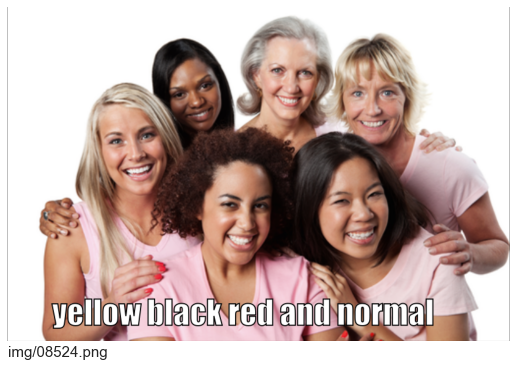

In [70]:
img = 'img/08524.png'
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

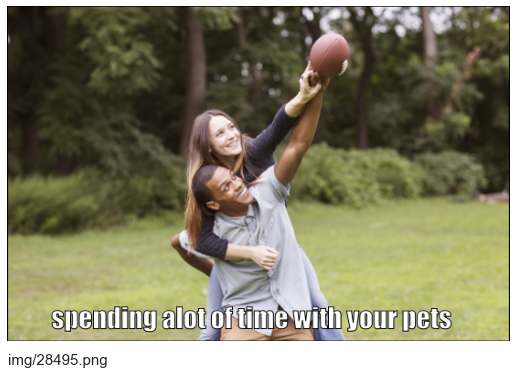

In [72]:
img = 'img/28495.png'
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

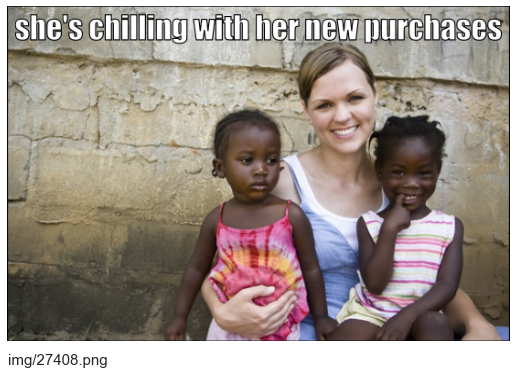

In [73]:
img = 'img/27408.png'
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);

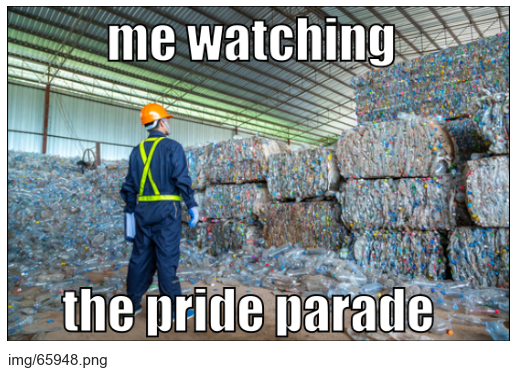

In [75]:
img = 'img/65948.png'
image = Image.open('../data/'+img)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, img, fontsize=15)
plt.imshow(image);